<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("skimr")
install.packages("psych")
install.packages("lsr")
install.packages("effsize")
install.packages("tibble")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
install.packages("boot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [36]:
library(boot)


Attaching package: ‘boot’


The following object is masked from ‘package:psych’:

    logit




In [2]:
library(tidyverse)
require(readxl)
library(skimr)
library(psych)
library(tibble)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: readxl


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [129]:
meta <- read_xlsx('/content/metadata.xlsx', sheet =1)
meta <- rename_with(meta, make.names)
meta <- select(meta, -Name, -Sucrose)
meta <- mutate(meta,Patient.number = as.factor(Patient.number),
              Vial.number = as.factor(Vial.number),
              Group = as.factor(Group),
              Sm = as.factor(Sm),
              LVH = as.factor(LVH),
              IHD = as.factor(IHD),
              MI = as.factor(MI),
              Str = as.factor(Str),
              A_C = as.factor(A_C),
              A_H = as.factor(A_H),
              A_D = as.factor(A_D),
              HT = as.factor(HT))

In [130]:
attr(meta$Ht, "label") <- "Growth"
attr(meta$Wt, "label") <- "Weight"
attr(meta$BMI, "label") <- "Body mass index"
attr(meta$Sys, "label") <- "Systolic blood pressure"
attr(meta$Dia, "label") <- "Diastolic blood pressure"
attr(meta$PR, "label") <- "Pulse"
attr(meta$Sm, "label") <- "Smoking"
attr(meta$Dm, "label") <- "Diabetes"
attr(meta$HT, "label") <- "Hypertension"
attr(meta$LVH, "label") <- "Left ventricular hypertrophy by electrocardiogram"
attr(meta$MI, "label") <- "Medical history of infarction"
attr(meta$Str, "label") <- "Medical history of stroke"
attr(meta$A_C, "label") <- "Family history of CAD"
attr(meta$A_H, "label") <- "Family history hypertension"
attr(meta$A_D, "label") <- "Family history diabetes"
attr(meta$Choi...25, "label") <- "Cholesterol"
attr(meta$Choi...29, "label") <- "Cholesterol"
attr(meta$Tgi...26, "label") <- "Triglycerides"
attr(meta$Tgi...30, "label") <- "Triglycerides"
attr(meta$HDLi...27, "label") <- "High density lipoprotein"
attr(meta$HDLi...31, "label") <- "High density lipoprotein"
attr(meta$LDLi...28, "label") <- "Low density lipoprotein"
attr(meta$LDLi...32, "label") <- "Low density lipoprotein"
attr(meta$AI, "label") <- "Atherogenicity index"

In [22]:
meta <- meta %>%
  mutate(Age_interval = cut(Age, breaks = c(0, 50, 60, 70, 80, Inf), labels = c("<50", "50-60", "60-70", "70-80", ">80")))

In [23]:
meta <- meta %>%
  mutate(PR_interval = cut(PR, breaks = c(60, 80, 90, Inf), labels = c("<60", "60-80", ">90")))

In [24]:

meta <- meta %>%
  mutate(BMI_weight = cut(BMI, breaks = c(0, 20, 25, 30, 35, 40, Inf), labels = c("0", "1","2", "3", "4", "5")))

# 0 - "underweight", 1 - "normal", 2- "overweight", 3-  "obese_1", 4- "obese_2", 5-"obese_3"

In [9]:
# Попробуем построить модель для предсказания назначения статинов.

# ЗП - Statins. 0 - пациент не принимает статины, 1 - принимает

#  В качестве переменных, которые могут предсказывать вероятность приема статитонов возьмем:



# AI
# SIS
# DIA
# CHOI 29


In [131]:
meta <- meta %>% drop_na(Statins)

In [165]:
numeric_list <- meta[c("Sys", "Dia", "AI", "Choi...29")]

categorial_list <- meta[c("Statins")]

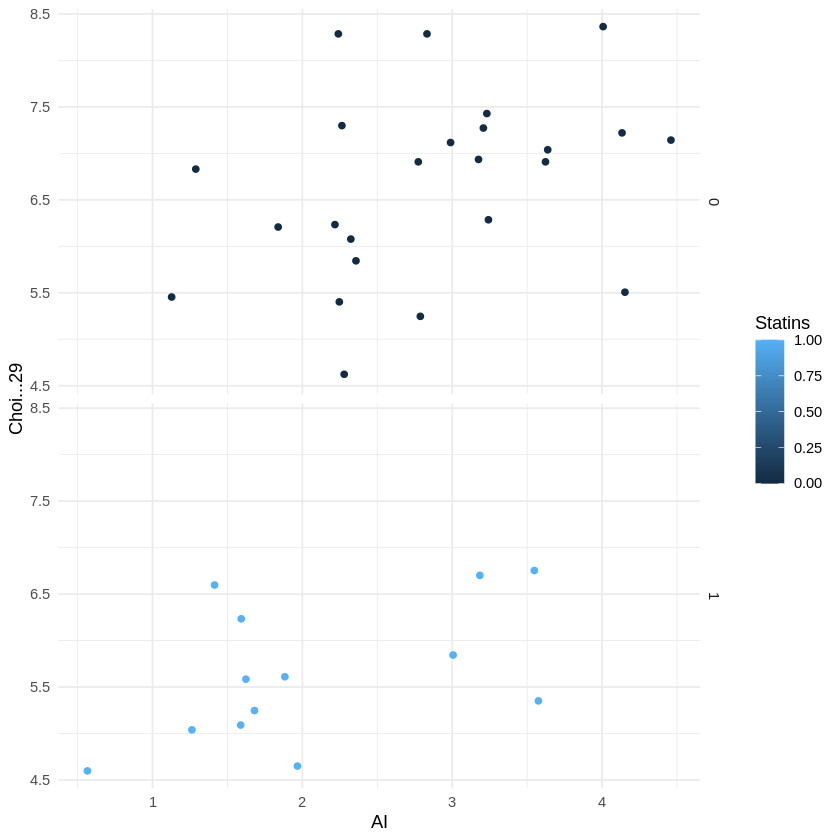

In [133]:
ggplot(meta, aes(x = AI, y = Choi...29)) + #  AI переменная по оси X, Choi...29 - по оси Y
  geom_point(aes(colour = Statins)) + # точки на графике, где цвет точек соотвестует переменной Statins.
  facet_grid(rows = vars(Statins)) +  #  .
  theme_minimal()

# Посмотрим есть ли какая_нибудь зависимость уровнем холестенина и АФ у людей, принимающих статины и нет. Точки слабо "кучкуются" между собой

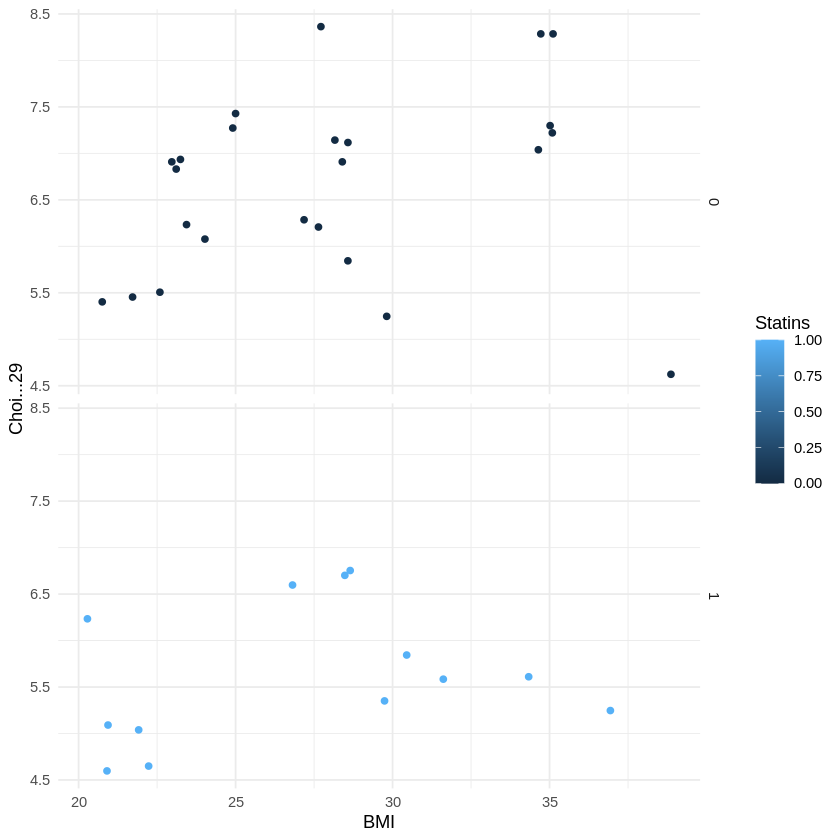

In [27]:
ggplot(meta, aes(x = BMI, y = Choi...29)) +
  geom_point(aes(colour = Statins)) +
  facet_grid(rows = vars(Statins)) +
  theme_minimal()

# Посмотрим есть ли какая_нибудь зависимость уровнем холестенина и ИМТ у людей, принимающих статины и нет. Здесь разброс

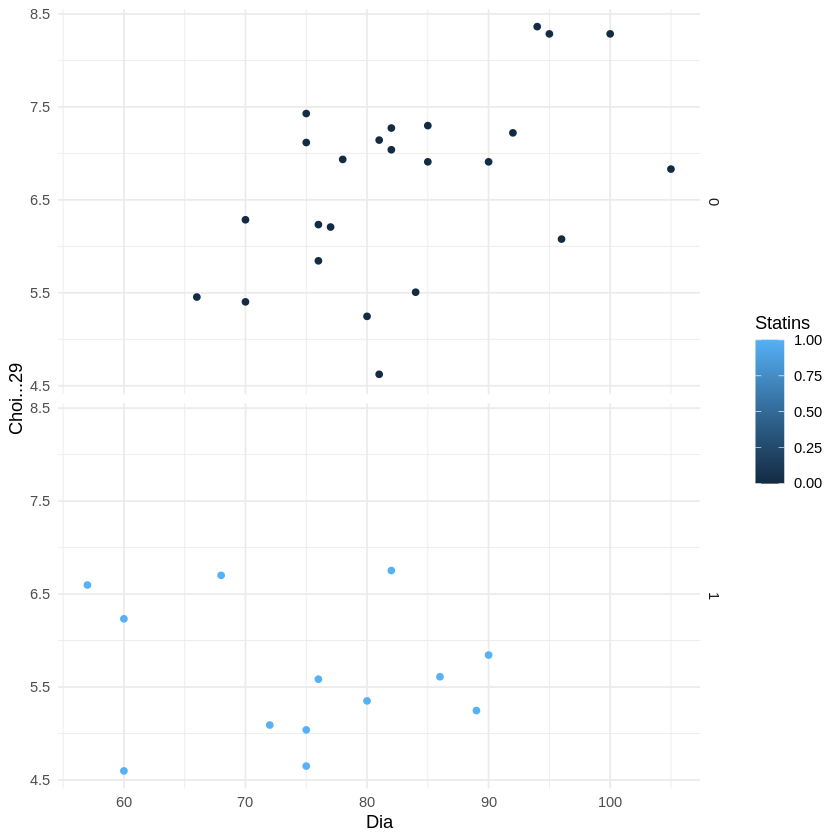

In [28]:
ggplot(meta, aes(x = Dia, y = Choi...29)) +
  geom_point(aes(colour = Statins)) +
  facet_grid(rows = vars(Statins)) +
  theme_minimal()


# Посмотрим есть ли какая_нибудь зависимость уровнем холестенина и САД и ДАД у людей, принимающих статины и нет. Кажется, что здесь по графику зависимость больше всего

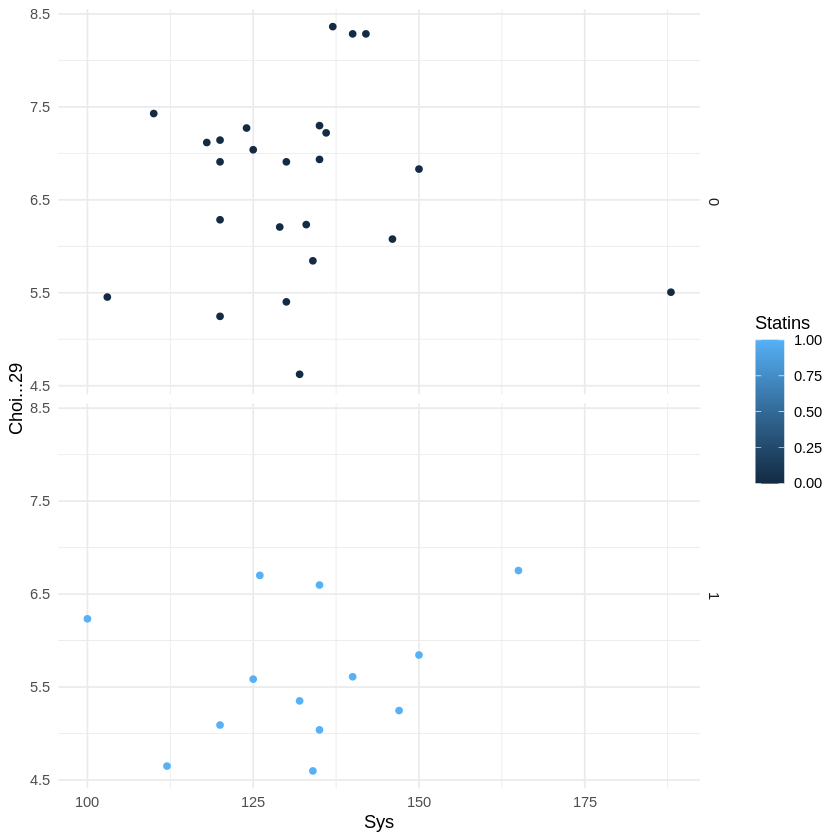

In [29]:
ggplot(meta, aes(x = Sys, y = Choi...29)) +
  geom_point(aes(colour = Statins)) +
  facet_grid(rows = vars(Statins)) +
  theme_minimal()

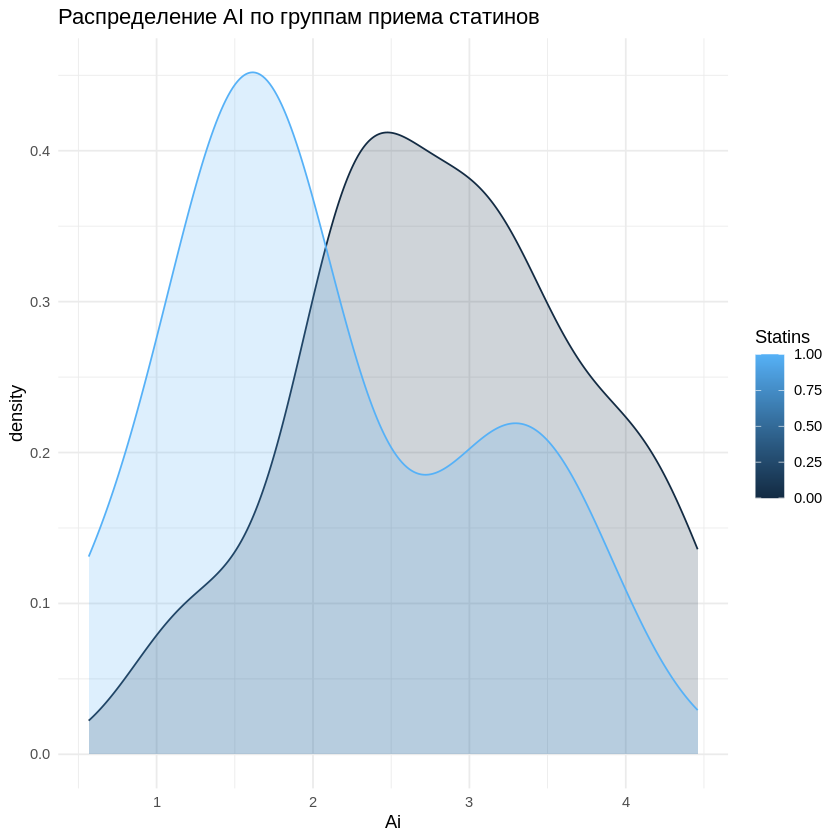

In [30]:
ggplot(meta, aes(x = AI, col = Statins, fill = Statins, group = Statins)) +
  geom_density(alpha = 0.2) +
  labs(title = 'Распределение AI по группам приема статинов', x = 'Ai') + theme_minimal()

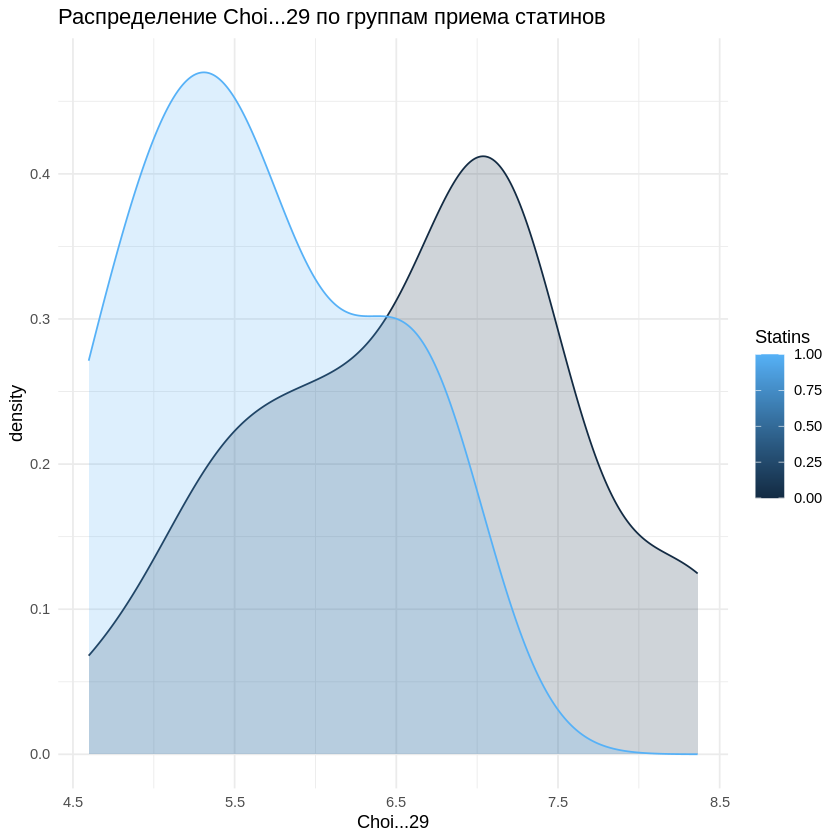

In [31]:
ggplot(meta, aes(x = Choi...29, col = Statins, fill = Statins, group = Statins)) +
  geom_density(alpha = 0.2) +
  labs(title = 'Распределение Choi...29 по группам приема статинов', x = 'Choi...29') + theme_minimal()

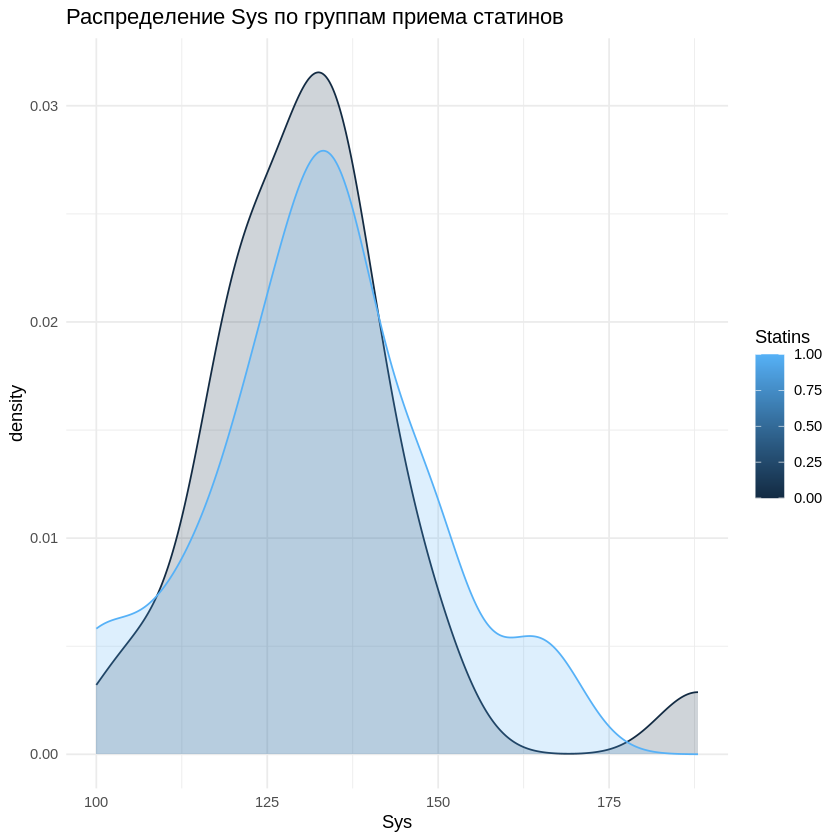

In [32]:
ggplot(meta, aes(x = Sys, col = Statins, fill = Statins, group = Statins)) +
  geom_density(alpha = 0.2) +
  labs(title = 'Распределение Sys по группам приема статинов', x = 'Sys') + theme_minimal()

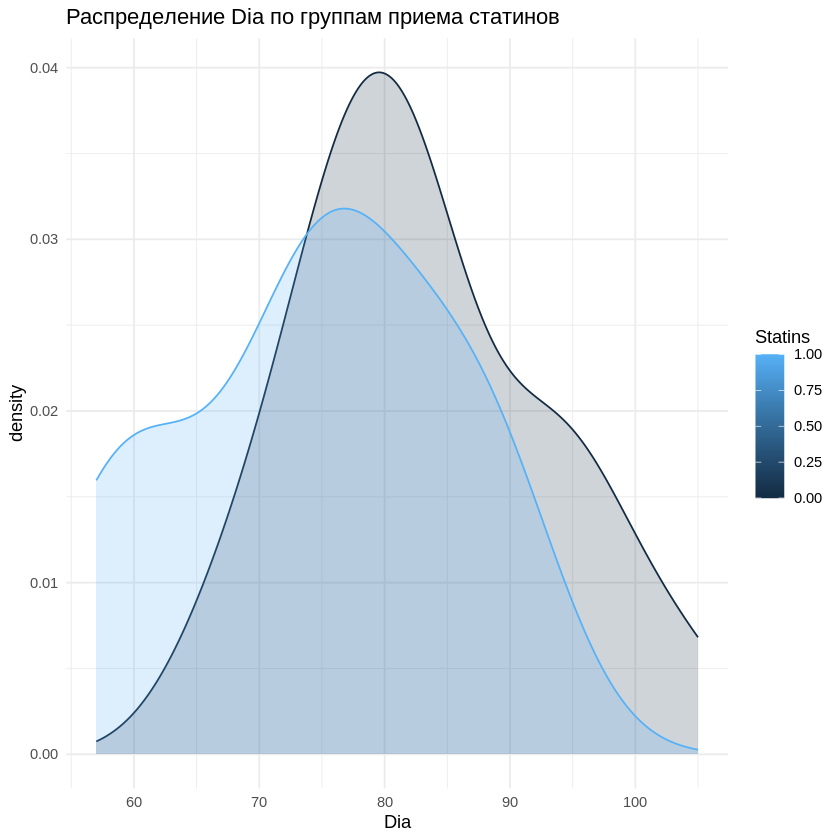

In [33]:
ggplot(meta, aes(x = Dia, col = Statins, fill = Statins, group = Statins)) +
  geom_density(alpha = 0.2) +
  labs(title = 'Распределение Dia по группам приема статинов', x = 'Dia') + theme_minimal()

In [166]:
data_meta <- cbind(numeric_list, categorial_list)

In [167]:
data_meta

Sys,Dia,AI,Choi...29,Statins
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
125,76,1.6232772,5.584416,1
125,82,3.6372361,7.038961,0
132,80,3.5751295,5.350649,1
130,90,3.6223507,6.909091,0
135,75,1.2630208,5.038961,1
110,75,3.2310178,7.428571,0
124,82,3.2078560,7.272727,0
135,78,3.1754386,6.935065,0
142,95,2.8315946,8.285714,0


In [168]:
#функция, которая использует метод bootstrap для создания бустрап выборок и для вычисления доверительных интервалов для среднего значения в данных
bootstrap_function_n <- function(data_meta, group_value, variable) {
  boot(data_meta[meta$Statins == group_value, variable], statistic = function(x, i) mean (x[i]), R = 1000)
}



In [170]:
# Генерируем выборку на пациентах, не принимающих статины
bootstap_results_Sys <- bootstrap_function_n(data_meta, 0, 'Sys')
bootstap_results_Dia <- bootstrap_function_n(data_meta, 0, 'Dia')
bootstap_results_AI <- bootstrap_function_n(data_meta, 0, 'AI')
bootstap_results_Choi <- bootstrap_function_n(data_meta, 0, 'Choi...29')


In [171]:
boot_0_Sys <- bootstap_results_Sys$t %>% as_tibble() %>% mutate(Statins = 0) %>% rename(SYS = V1)
boot_0_Dia <- bootstap_results_Dia$t %>% as_tibble() %>% mutate(Statins = 0) %>% rename(DIA = V1)
boot_0_AI <- bootstap_results_AI$t %>% as_tibble() %>% mutate(Statins = 0) %>% rename(AI = V1)
boot_0_Choi <- bootstap_results_Choi$t %>% as_tibble() %>% mutate(Statins = 0) %>% rename(Choi = V1)


In [172]:
boot_0_Sys # Все значения сгенерированной выборки относятся к классу 0 Statins

SYS,Statins
<dbl>,<dbl>
132.5000,0
125.8333,0
129.7500,0
133.7917,0
130.6250,0
130.0000,0
133.5833,0
133.6667,0
131.8333,0


In [173]:
# Генерируем выборку на пациентах, принимающих статины
bootstap_results_1_Sys <- bootstrap_function_n(data_meta, 1, 'Sys')
bootstap_results_1_Dia <- bootstrap_function_n(data_meta, 1, 'Dia')
bootstap_results_1_AI <- bootstrap_function_n(data_meta, 1, 'AI')
bootstap_results_1_Choi <- bootstrap_function_n(data_meta, 1, 'Choi...29')


In [174]:
boot_1_Sys <- bootstap_results_1_Sys$t %>% as_tibble() %>% mutate(Statins = 1) %>% rename(SYS = V1)
boot_1_Dia <- bootstap_results_1_Dia$t %>% as_tibble() %>% mutate(Statins = 1) %>% rename(DIA = V1)
boot_1_AI <- bootstap_results_1_AI$t %>% as_tibble() %>% mutate(Statins = 1) %>% rename(AI = V1)
boot_1_Choi <- bootstap_results_1_Choi$t %>% as_tibble() %>% mutate(Statins = 1) %>% rename(Choi = V1)
boot_1_BMI <- bootstap_results_1_Sys$t %>% as_tibble() %>% mutate(Statins = 1) %>% rename(BMI = V1)

In [175]:
boot_mix_Sys <- bind_rows(boot_0_Sys, boot_1_Sys)
boot_mix_Dia <- bind_rows(boot_0_Dia, boot_1_Dia)
boot_mix_AI <- bind_rows(boot_0_AI, boot_1_AI)
boot_mix_Choi <- bind_rows(boot_0_Choi, boot_1_Choi)
boot_mix_BMI <- bind_rows(boot_0_BMI, boot_1_BMI)

In [176]:
boot_mix_Sys <- boot_mix_Sys[,!(names(boot_mix_Sys) %in% c("Statins"))]
boot_mix_Dia <- boot_mix_Dia[,!(names(boot_mix_Dia) %in% c("Statins"))]
boot_mix_AI <- boot_mix_AI[,!(names(boot_mix_AI) %in% c("Statins"))]
#boot_mix_Choi <- boot_mix_Choi[,!(names(boot_mix_Choi) %in% c("Statins"))]
boot_mix_BMI <- boot_mix_BMI[,!(names(boot_mix_BMI) %in% c("Statins"))]

In [177]:
bootstap_meta <- cbind(boot_mix_Sys, boot_mix_Dia, boot_mix_AI, boot_mix_Choi)

In [178]:
bootstap_meta

SYS,DIA,AI,Choi,Statins
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132.5000,82.33333,2.869594,6.535714,0
125.8333,82.87500,2.611142,6.555195,0
129.7500,83.83333,2.863459,6.768398,0
133.7917,79.91667,2.516738,6.478355,0
130.6250,82.91667,2.835476,6.798701,0
130.0000,82.33333,2.841281,6.719697,0
133.5833,82.00000,2.929767,6.884199,0
133.6667,83.91667,2.915868,6.882035,0
131.8333,82.91667,2.960563,6.827922,0


In [179]:
model_0 <- glm(formula = Statins~1, data = bootstap_meta, family = "binomial")
model_0


Call:  glm(formula = Statins ~ 1, family = "binomial", data = bootstap_meta)

Coefficients:
(Intercept)  
 -8.174e-17  

Degrees of Freedom: 1999 Total (i.e. Null);  1999 Residual
Null Deviance:	    2773 
Residual Deviance: 2773 	AIC: 2775

In [180]:
model_1 <- glm(formula = Statins~1+SYS+DIA+AI+Choi, data = bootstap_meta, family = "binomial")
model_1

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:  glm(formula = Statins ~ 1 + SYS + DIA + AI + Choi, family = "binomial", 
    data = bootstap_meta)

Coefficients:
(Intercept)          SYS          DIA           AI         Choi  
  1435.4230      -0.2332      -7.5443     -81.2561     -96.9150  

Degrees of Freedom: 1999 Total (i.e. Null);  1995 Residual
Null Deviance:	    2773 
Residual Deviance: 2.015e-07 	AIC: 10

In [153]:
summary(model_1)


Call:
glm(formula = Statins ~ 1 + SYS + DIA + AI + Choi, family = "binomial", 
    data = bootstap_meta)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   1652.497 310902.674   0.005    0.996
SYS             -1.461   2649.398  -0.001    1.000
DIA             -6.114   2749.538  -0.002    0.998
AI             -46.086  28609.388  -0.002    0.999
Choi          -137.806  23751.072  -0.006    0.995

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2.7726e+03  on 1999  degrees of freedom
Residual deviance: 2.1991e-07  on 1995  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


In [154]:
confint(model_1)

Waiting for profiling to be done...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,2.5 %,97.5 %
(Intercept),-6147.5760,8951.5328
SYS,-150.7078,157.5759
DIA,-115.0189,113.9282
AI,-1625.7279,1490.1459
Choi,-793.1158,486.9560


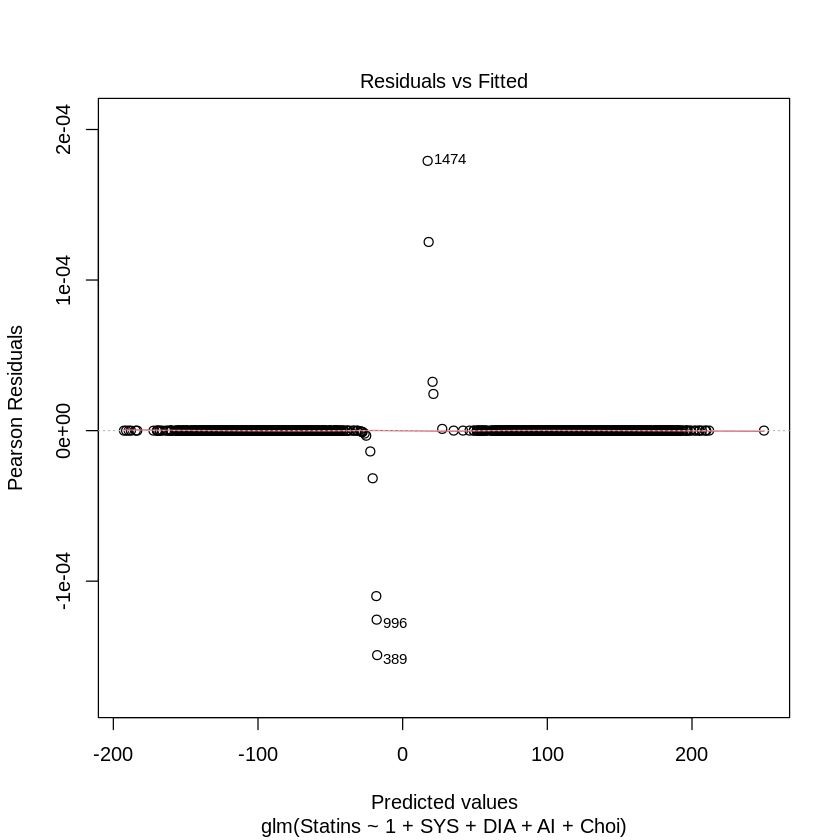

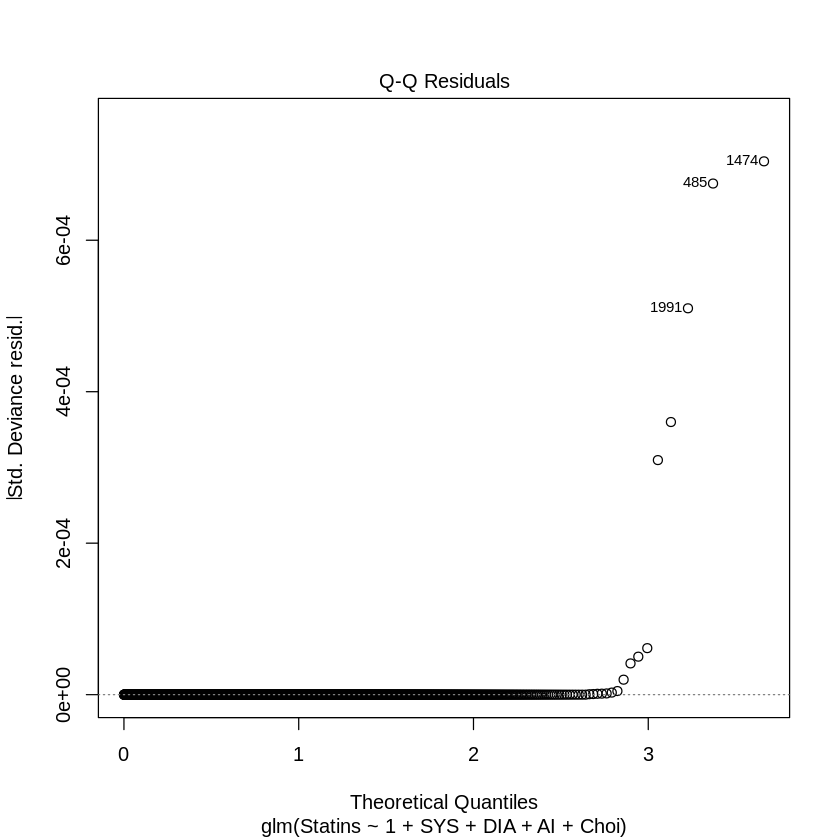

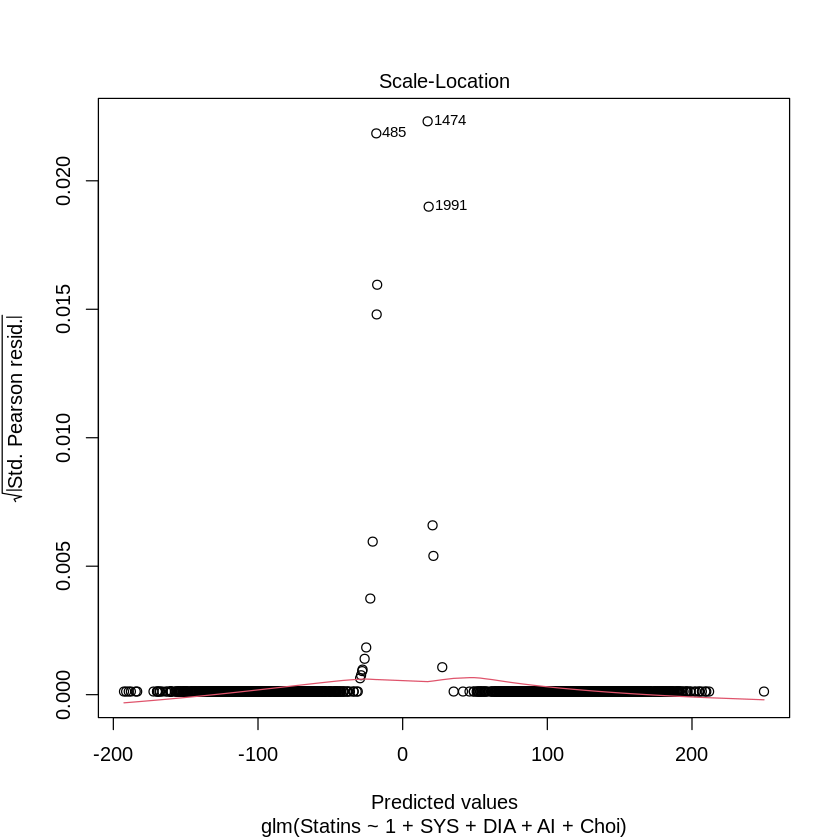

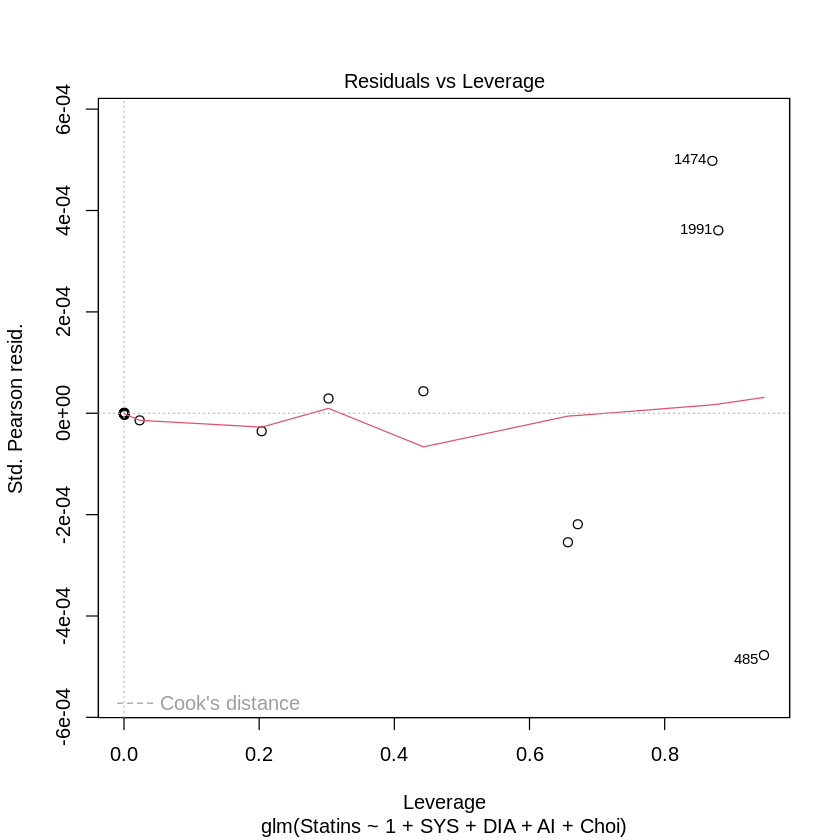

In [184]:
plot(model_1)
# кажется, что модель по предсказанию о необходимости назначить статины переобученна и повтоярет данные, на к-х обучилась

In [181]:
model_2 <- glm(Choi ~ DIA+AI+SYS, data =  bootstap_meta, family = gaussian(link = "identity"))
model_2

# Попробуем предсказть уровень холестерина пациента в зависимости от давления и АФ


Call:  glm(formula = Choi ~ DIA + AI + SYS, family = gaussian(link = "identity"), 
    data = bootstap_meta)

Coefficients:
(Intercept)          DIA           AI          SYS  
   1.120547     0.050744     0.561331    -0.002692  

Degrees of Freedom: 1999 Total (i.e. Null);  1996 Residual
Null Deviance:	    590.7 
Residual Deviance: 151.7 	AIC: 527.4

In [182]:
confint(model_2)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.630522646,1.6105709049
DIA,0.046993725,0.0544936133
AI,0.519823799,0.6028375701
SYS,-0.005843604,0.0004594167


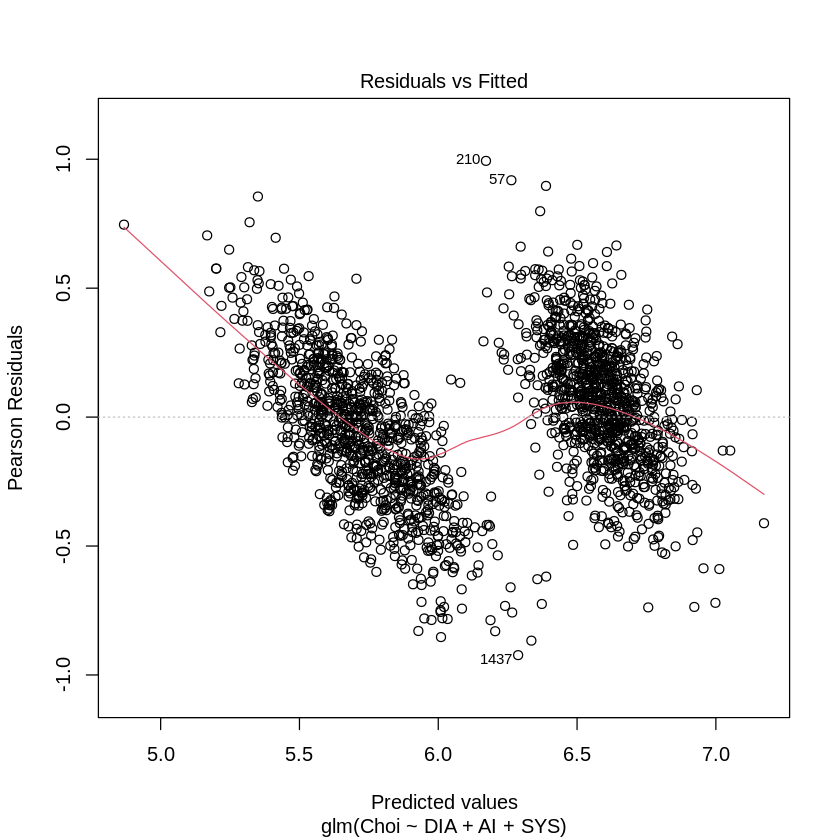

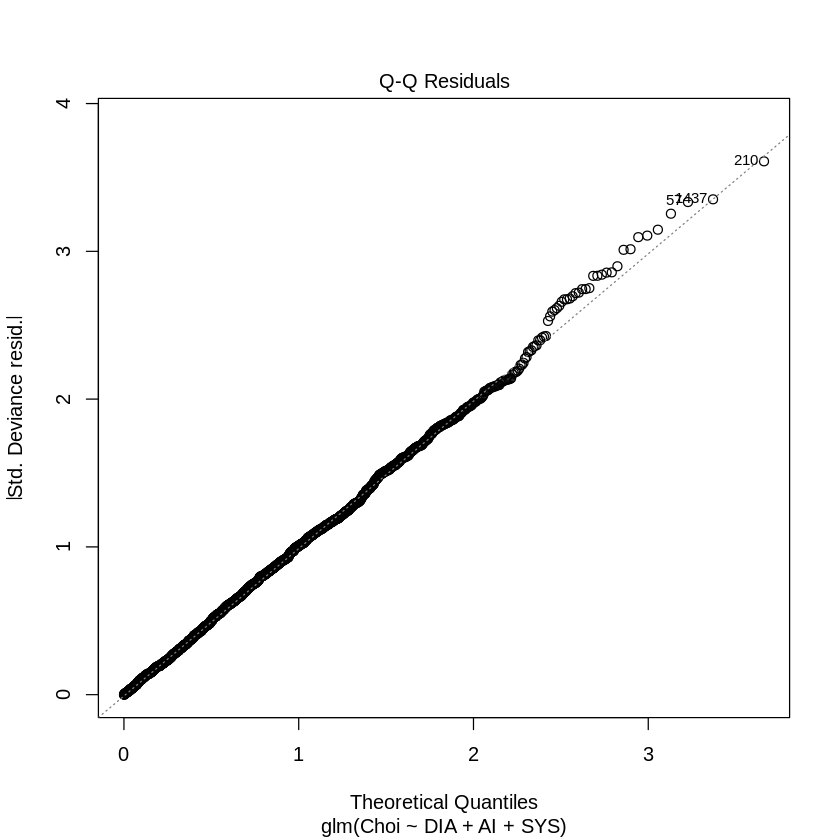

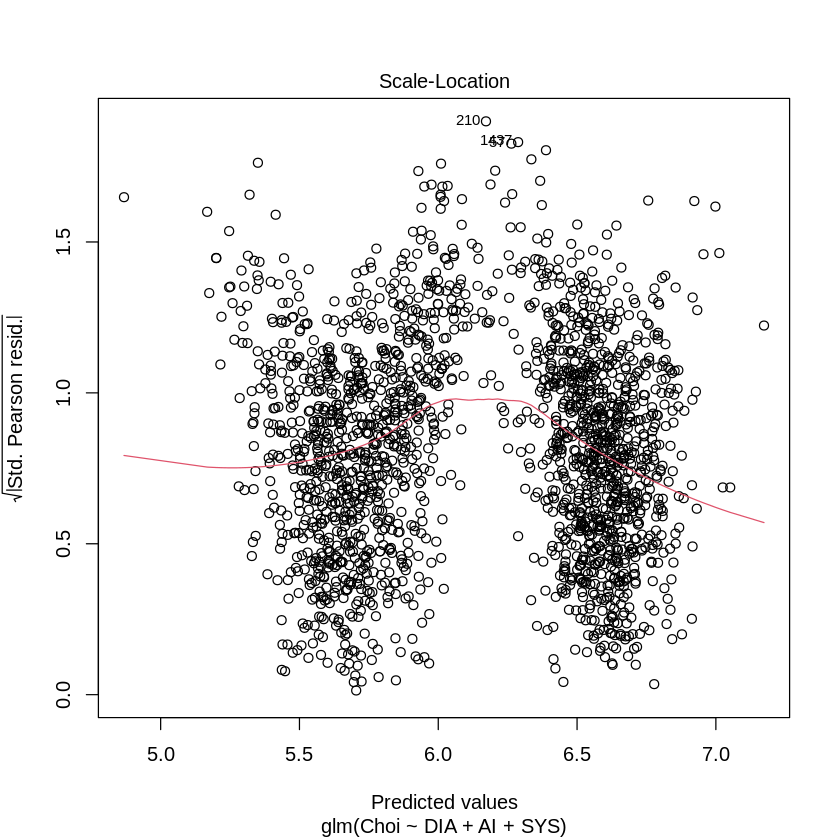

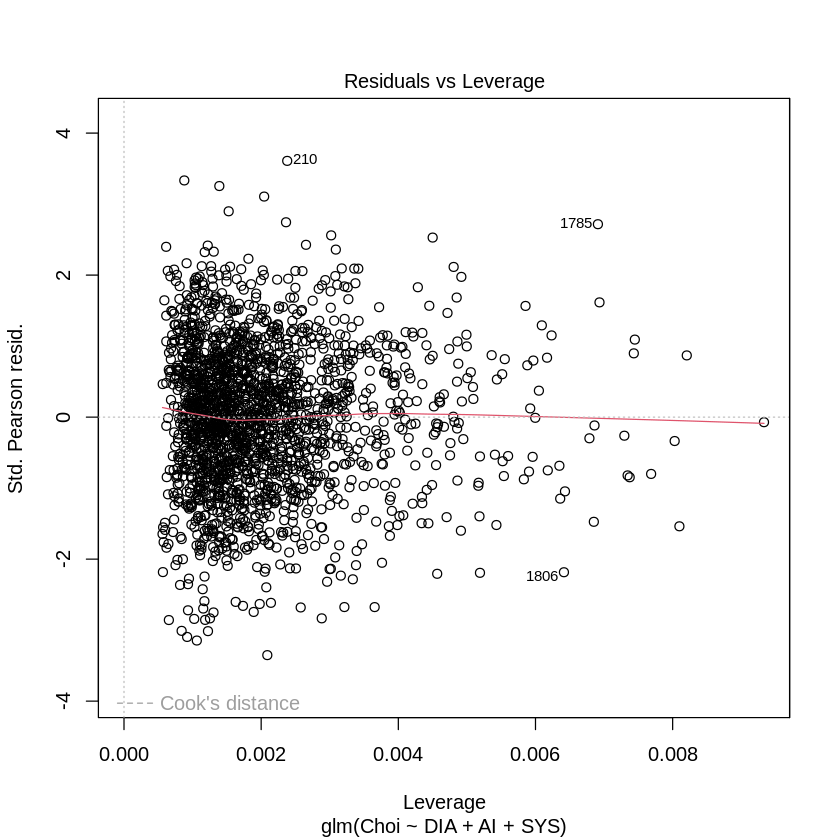

In [183]:
plot(model_2)